In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve, accuracy_score

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_init = pd.read_csv('data.csv', sep=';')
df_init.head()

,Id,Result,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100
0,1,2,2,56.0,12,1,7.0,4.0,0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2,2,2,69.0,19,1,6.0,4.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2,1,66.0,8,1,4.0,4.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2,2,62.0,16,1,NaN,3.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2,2,67.0,30,1,NaN,4.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df_init.copy()

target_name = 'Result'
golden_features = ['Feature_3', 'Feature_4', 'Feature_32', 'Feature_35']
feature_names = df.columns.drop([target_name] + golden_features + ['Id']).tolist()

df = df[[target_name] + feature_names]
df.fillna(0, inplace=True)

In [4]:
df.describe()

,Result,Feature_1,Feature_2,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,...,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,1.685315,1.496503,66.594406,2.664336,2.839161,0.090909,0.755245,0.587413,0.293706,0.279720,...,0.020979,0.090909,0.153846,0.160839,0.083916,0.300699,0.0,0.041958,0.265734,0.0
std,0.466023,0.501745,15.666973,3.126317,0.801850,0.288490,0.431453,0.494030,0.457060,0.450439,...,0.143818,0.288490,0.362069,0.368674,0.278236,1.156945,0.0,0.201198,0.887718,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,1.000000,1.000000,56.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,2.000000,1.000000,68.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,2.000000,2.000000,80.000000,5.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
max,2.000000,2.000000,97.000000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,0.0,1.000000,9.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 97 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Result       143 non-null    int64  
 1   Feature_1    143 non-null    int64  
 2   Feature_2    143 non-null    float64
 3   Feature_5    143 non-null    float64
 4   Feature_6    143 non-null    float64
 5   Feature_7    143 non-null    int64  
 6   Feature_8    143 non-null    float64
 7   Feature_9    143 non-null    float64
 8   Feature_10   143 non-null    float64
 9   Feature_11   143 non-null    float64
 10  Feature_12   143 non-null    float64
 11  Feature_13   143 non-null    float64
 12  Feature_14   143 non-null    float64
 13  Feature_15   143 non-null    float64
 14  Feature_16   143 non-null    int64  
 15  Feature_17   143 non-null    float64
 16  Feature_18   143 non-null    float64
 17  Feature_19   143 non-null    int64  
 18  Feature_20   143 non-null    int64  
 19  Feature_

In [6]:
def get_best_model(X, y):
    models = {
        0: {'name': 'LogisticRegression', 'estimator': LogisticRegression()},
        1: {'name': 'RidgeClassifier', 'estimator': RidgeClassifier()},
        2: {'name': 'SGDClassifier', 'estimator': SGDClassifier()},
        3: {'name': 'LinearSVC', 'estimator': LinearSVC()},
        4: {'name': 'GradientBoostingClassifier', 'estimator': GradientBoostingClassifier()},
    }

    scalers = {
        0: {'name': 'None', 'estimator': None},
        1: {'name': 'StandardScaler', 'estimator': StandardScaler()},
        2: {'name': 'Normalizer', 'estimator': Normalizer()},
        3: {'name': 'MinMaxScaler', 'estimator': MinMaxScaler()}
    }

    for i in scalers.keys():
        X_ = X.copy()
        if scalers[i]['estimator'] is not None:
            X_ = scalers[i]['estimator'].fit_transform(X_)

        print(f"\nScaler: {scalers[i]['name']}")
        for k in models.keys():
            score = cross_val_score(
                models[k]['estimator'],
                X_,
                y,
                scoring="accuracy",
                cv=StratifiedKFold(
                    n_splits=5,
                    shuffle=True,
                    random_state=0
                ),
            )
            
            print(f"\t{models[k]['name']}: {round(score.mean(),2)}")

In [7]:
X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=True,
    test_size=0.1,
    random_state=100,
    stratify=y
)

get_best_model(X_train, y_train)


Scaler: None
	LogisticRegression: 0.76
	RidgeClassifier: 0.73
	SGDClassifier: 0.59
	LinearSVC: 0.67
	GradientBoostingClassifier: 0.75

Scaler: StandardScaler
	LogisticRegression: 0.77
	RidgeClassifier: 0.67
	SGDClassifier: 0.77
	LinearSVC: 0.66
	GradientBoostingClassifier: 0.76

Scaler: Normalizer
	LogisticRegression: 0.69
	RidgeClassifier: 0.69
	SGDClassifier: 0.61
	LinearSVC: 0.68
	GradientBoostingClassifier: 0.83

Scaler: MinMaxScaler
	LogisticRegression: 0.8
	RidgeClassifier: 0.81
	SGDClassifier: 0.81
	LinearSVC: 0.77
	GradientBoostingClassifier: 0.76


In [8]:
X_ = Normalizer().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_,
    y,
    shuffle=True,
    test_size=0.1,
    random_state=100,
    stratify=y
)

clf = GradientBoostingClassifier(
    random_state=0
)

parameters = {
    'learning_rate': [0.05, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'min_samples_leaf': [1, 2.5, 5],
    'max_depth': [3, 6, 10],
}

gs = GridSearchCV(
    clf,
    parameters,
    verbose=1
)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  5.0min finished


GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 6, 10],
                         'min_samples_leaf': [1, 2.5, 5],
                         'n_estimators': [100, 300, 500]},
             verbose=1)

In [10]:
clf_final = GradientBoostingClassifier(
    random_state=0,
    **gs.best_params_,
)
clf_final.fit(X_train, y_train)

y_train_pred = clf_final.predict(X_train)
y_test_pred = clf_final.predict(X_test)

print(f'Accuracy on train: {round(accuracy_score(y_train, y_train_pred), 2)}')
print(f'Accuracy on test: {round(accuracy_score(y_test, y_test_pred), 2)}')

print(f'\nClassification report: \n{classification_report(y_test, y_test_pred)}')
print(f'\nConfusion matrix:\n {confusion_matrix(y_test, y_test_pred)}')

Accuracy on train: 1.0
Accuracy on test: 0.87

Classification report: 
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.90      0.90      0.90        10

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15


Confusion matrix:
 [[4 1]
 [1 9]]


In [11]:
feature_importances = pd.DataFrame(
    zip(X.columns, clf_final.feature_importances_),
    columns=['feature_name', 'importance']
)

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.head(50)

,feature_name,importance
30,Feature_34,0.244628
26,Feature_29,0.103284
65,Feature_70,0.097664
89,Feature_94,0.081781
36,Feature_41,0.077783
6,Feature_9,0.050535
29,Feature_33,0.047561
52,Feature_57,0.037114
41,Feature_46,0.035946
1,Feature_2,0.035736


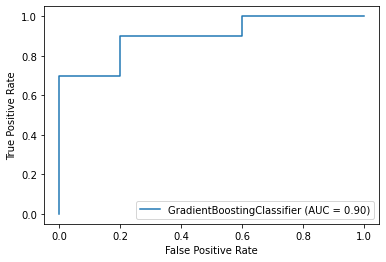

In [12]:
plot_roc_curve(clf_final, X_test, y_test)

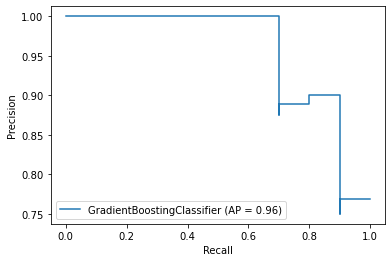

In [13]:
plot_precision_recall_curve(clf_final, X_test, y_test)